STAT 479 Homework 2
Cory Suzuki

In [1]:
# Import all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data and check the shape of the dataset. 

cancer_data = load_breast_cancer()
cancer_data.data.shape

(569, 30)

1a. There are 569 samples in this dataset and 30 features.

In [3]:
# Convert the dataset into a Pandas dataframe and find the mean concavity for observation 564. 

cancer_new = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_new['target'] = cancer_data.target
cancer_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


1b. The mean concavity for observation 564 is reported to be 0.24390.

In [4]:
# Split the original dataset into training, validation, and testing sets with an 80-10-10 split. 

X = cancer_new.drop(['target'], axis=1)
y = cancer_new.drop(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
                      'mean concave points', 'mean symmetry', 'mean fractal dimension', 'mean texture', 'radius error', 'texture error',
                        'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error',
                          'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter',
                     'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry',
                       'worst fractal dimension'], axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=.50, shuffle=True, random_state=42)

splits = [X_train, y_train, X_valid, y_valid, X_test, y_test]
for index in splits:
    print(index.shape)

(455, 30)
(455, 1)
(57, 30)
(57, 1)
(57, 30)
(57, 1)


In [5]:
# Standardize the training, validation, and testing sets using the StandardScaler() from Sci-Kit Learn's Preprocessing module. 

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)
scaler.transform(X_test)
sample_size_cancer, dimensions_cancer = X_train.shape

In [6]:
# Create a feedforward Neural Network (FNN) with one hidden layer with 16 neurons and ReLU activation and an output layer with 1
# neuron and sigmoid activation for binary classification. 

keras_FNN_cancer = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(dimensions_cancer,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
# Compile the model using binary cross entropy loss function, Adam optimizer, and tracking accuracy during training. 

keras_FNN_cancer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model for 100 epochs, but include the validation data during training by passing the validation_data argument to 
# model.fit(). Use the training data for training and validation data for monitoring overfitting. Record the loss and accuracy
# for both training and validation data at each epoch. 

train_FNN_cancer = keras_FNN_cancer.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100)
print("Train score:", keras_FNN_cancer.evaluate(X_train, y_train))
print("Validation score:", keras_FNN_cancer.evaluate(X_valid, y_valid))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6163 - loss: 424.4063 - val_accuracy: 0.5263 - val_loss: 467.9424
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 340.1393 - val_accuracy: 0.5263 - val_loss: 380.8787
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6334 - loss: 289.6225 - val_accuracy: 0.5263 - val_loss: 298.1970
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6190 - loss: 231.7980 - val_accuracy: 0.5263 - val_loss: 223.3968
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6136 - loss: 166.4760 - val_accuracy: 0.5263 - val_loss: 152.6719
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6235 - loss: 109.6467 - val_accuracy: 0.5263 - val_loss: 83.8613
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6335 - loss: 44.9411 - val_accuracy: 0.2982 - val_loss: 18.6434
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3522 - loss: 12.5718

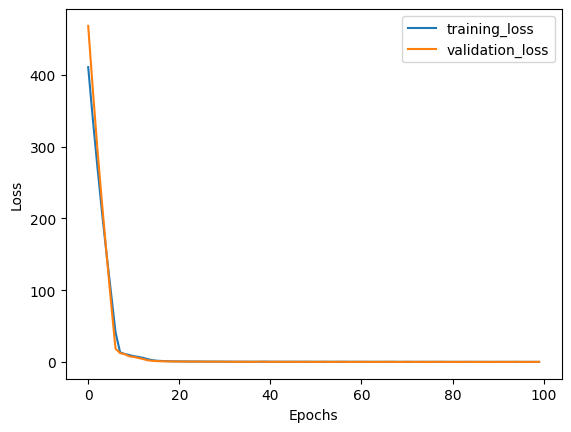

In [9]:
# After training, plot the training loss and validation loss over the 100 epochs. Use this plot to visually determine the point
# at which the model begins to overfit (when the validation loss stops decreasing and starts to increase) 

plt.plot(train_FNN_cancer.history['loss'], label='training_loss')
plt.plot(train_FNN_cancer.history['val_loss'], label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# According to the previous problem, rebuild your FNN. 

final_FNN_cancer = keras_FNN_cancer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75)
print("Train score:", keras_FNN_cancer.evaluate(X_train, y_train))
print("Test score:", keras_FNN_cancer.evaluate(X_test, y_test))

Epoch 1/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9354 - loss: 0.1591 - val_accuracy: 1.0000 - val_loss: 0.0546
Epoch 2/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9237 - loss: 0.1544 - val_accuracy: 0.9825 - val_loss: 0.0395
Epoch 3/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9213 - loss: 0.2018 - val_accuracy: 0.9825 - val_loss: 0.0559
Epoch 4/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1449 - val_accuracy: 0.9298 - val_loss: 0.1392
Epoch 5/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9175 - loss: 0.2384 - val_accuracy: 1.0000 - val_loss: 0.0476
Epoch 6/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9330 - loss: 0.1561 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 7/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9191 - loss: 0.1753 - val_accuracy: 1.0000 - val_loss: 0.0384
Epoch 8/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9357 - loss: 0.1545 - val_accuracy: 0.9825 - val_loss

In [11]:
# Evaluate your final model on the test set using the model.evaluate() function. Report the accuracy on the test set and reflect 
# on how well your model generalizes to unseen data. 

# From the previous evaluation code cell, the accuracy on the test set was 98.25% on correctly classifying the unseen data which is a significant 3.51% increase in model
# accuracy compared to that of the original model being trained on 100 epochs. The loss also is minimized to 0.063 compared to
# 0.159. By re-training the model on the epochs prior to the overfitting phenomenon, we can see that there is a substantial increase
# in accuracy and decrease in loss.